In [7]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  tqdm import tqdm
import plotly.graph_objects as go

import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [12]:
import sys
sys.path.append("../../src/")

In [13]:
%load_ext autoreload
%autoreload 2

from qeview.qe_analyse_FM import qe_analyse_FM
import qeview.wannier_loader as wnldr 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
Ang2Bohr = 1.8897259886
Bohr2Ang = 1./Ang2Bohr


# QE

In [18]:
calc = qe_analyse_FM('./', 'FeCl2')

efermi 5.70
Unit Cell Volume:   66.6024  (Ang^3)
alat 6.4228
Reciprocal-Space Vectors cart (Ang^-1)
[[ 1.7853615074 -1.0307789469  0.3372927535]
 [ 0.            2.0615578938  0.3372927535]
 [-1.7853615074 -1.0307789469  0.3372927535]]
Reciprocal-Space Vectors cart (2 pi / alat)
[[ 1.8250245048 -1.0536783891  0.3447859372]
 [ 0.            2.1073567783  0.3447859372]
 [-1.8250245048 -1.0536783891  0.3447859372]]
Real-Space Vectors cart (Ang)
[[ 1.7596395131 -1.0159283466  6.2094281022]
 [ 0.            2.0318566932  6.2094281022]
 [-1.7596395131 -1.0159283466  6.2094281022]]
Real-Space Vectors cart (alat)
[[ 0.2739689241 -0.1581760321  0.9667834369]
 [ 0.            0.3163520641  0.9667834369]
 [-0.2739689241 -0.1581760321  0.9667834369]]


 positions cart (alat)
['Fe', 'Cl', 'Cl']
[[-0.            0.           -0.          ]
 [ 0.           -0.            2.1508692713]
 [ 0.           -0.            0.7494810395]]
positions (frac or crystal)
[[-0.            0.            0.          

In [19]:
_,_ = calc.get_qe_kpathBS(filename="kpath_qe2.dat", saveQ=True, points_per_unit=20)

G 0.00000000 0.00000000 0.00000000 0.00000000
. 0.05000000 0.05000000 0.05000000 0.05171789
. 0.10000000 0.10000000 0.10000000 0.10343578
. 0.15000000 0.15000000 0.15000000 0.15515367
. 0.20000000 0.20000000 0.20000000 0.20687156
. 0.25000000 0.25000000 0.25000000 0.25858945
. 0.30000000 0.30000000 0.30000000 0.31030734
. 0.35000000 0.35000000 0.35000000 0.36202523
. 0.40000000 0.40000000 0.40000000 0.41374312
. 0.45000000 0.45000000 0.45000000 0.46546102
T 0.50000000 0.50000000 0.50000000 0.51717891
. 0.51382328 0.48617672 0.50000000 0.56763454
. 0.52764655 0.47235345 0.50000000 0.61809018
. 0.54146983 0.45853017 0.50000000 0.66854582
. 0.55529311 0.44470689 0.50000000 0.71900146
. 0.56911639 0.43088361 0.50000000 0.76945710
. 0.58293966 0.41706034 0.50000000 0.81991274
. 0.59676294 0.40323706 0.50000000 0.87036838
. 0.61058622 0.38941378 0.50000000 0.92082402
. 0.62440949 0.37559051 0.50000000 0.97127966
. 0.63823277 0.36176723 0.50000000 1.02173530
. 0.65205605 0.34794395 0.50000000

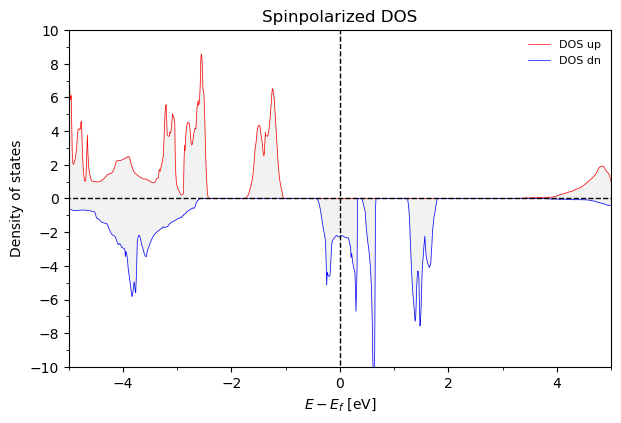

In [20]:
calc.plot_FullDOS()

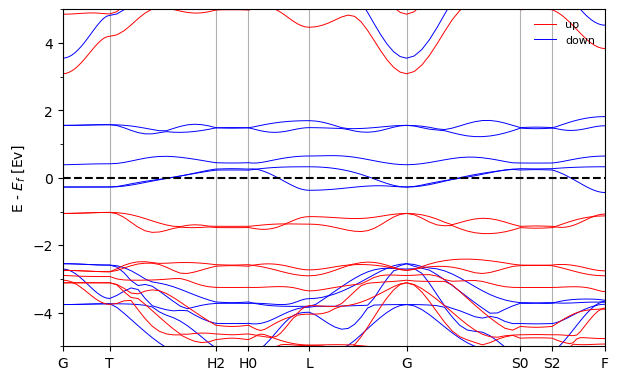

In [21]:
calc.plot_BS(efrom=-5, eto=5)

In [22]:
calc.print_bands_range(7, 20)

efermi 5.70
-------------SPIN UP---------------
band 8 eV from  -0.00 to  0.63                 eV-eF from  -5.70 to  -5.07
band 9 eV from  0.14 to  0.77                 eV-eF from  -5.56 to  -4.93
band 10 eV from  0.74 to  2.59                 eV-eF from  -4.96 to  -3.12
band 11 eV from  0.97 to  2.59                 eV-eF from  -4.73 to  -3.12
band 12 eV from  1.17 to  2.67                 eV-eF from  -4.53 to  -3.04
band 13 eV from  2.33 to  2.83                 eV-eF from  -3.38 to  -2.87
band 14 eV from  2.79 to  3.17                 eV-eF from  -2.91 to  -2.53
band 15 eV from  2.92 to  3.29                 eV-eF from  -2.79 to  -2.41
band 16 eV from  4.05 to  4.68                 eV-eF from  -1.66 to  -1.03
band 17 eV from  4.26 to  4.68                 eV-eF from  -1.45 to  -1.03
band 18 eV from  8.79 to  10.84                 eV-eF from  3.09 to  5.13
band 19 eV from  10.56 to  12.55                 eV-eF from  4.86 to  6.85
band 20 eV from  12.25 to  13.83                 eV-eF

In [23]:
calc.get_pDOS()

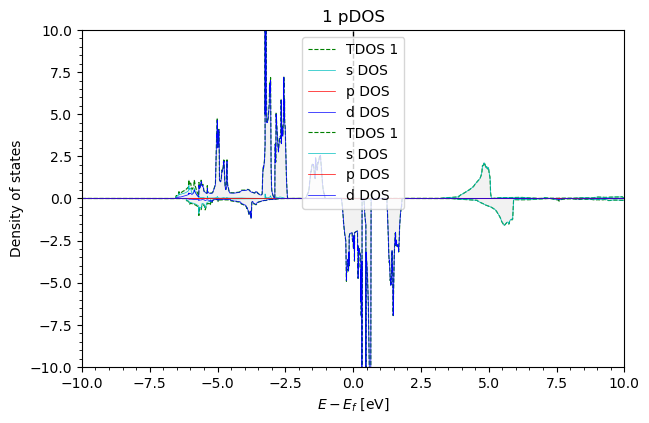

In [24]:
calc.plot_pDOS('1', efrom=-10, eto=10, yfrom=-10)

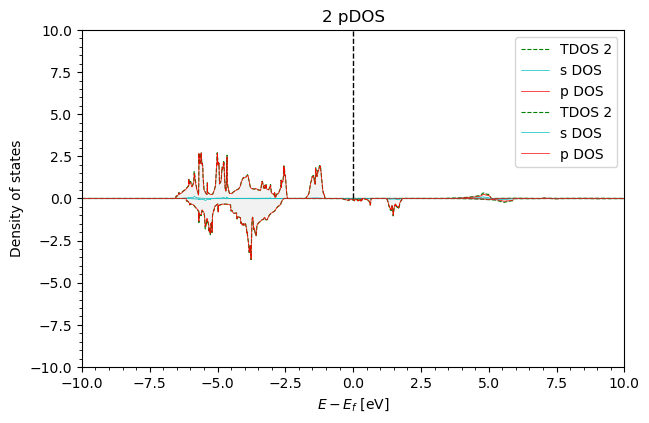

In [25]:
calc.plot_pDOS('2', efrom=-10, eto=10, yfrom=-10)

# Wannier bands

In [26]:
calc.load_wannier(kpath_filename='kpath_qe2.dat')

nwa  11
Rpts 813
we have 3D hamiltonian
nwa  11
Rpts 813
we have 3D hamiltonian


100%|██████████| 116/116 [00:00<00:00, 198.93it/s]


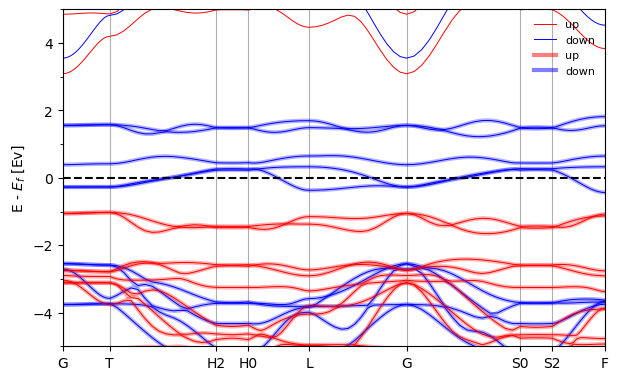

In [27]:
#interpolate the bands, on the plot bolds are interpolated wannier bands
calc.plot_wannier_BS(efrom=-5, eto=5)

In [ ]:
#now we want to plot the wannier bands on several BZ (normally you don't need to do this)
# for 3D plot of isosurfaces 

loader = wnldr.Wannier_loader_FM('./', 'FeCl2')

acell = np.linalg.norm(calc.acell[0]) # AA
b1 = calc.bcell[0][:3] / (2. * np.pi / acell)  # First reciprocal lattice vector in units of 2pi/a
b2 = calc.bcell[1][:3] / (2. * np.pi / acell) # Second reciprocal lattice vector in units of 2pi/a
b3 = calc.bcell[2][:3] / (2. * np.pi / acell) # Third reciprocal lattice vector in units of 2pi/a


nwa  11
Rpts 813
we have 3D hamiltonian
nwa  11
Rpts 813
we have 3D hamiltonian


In [31]:
klim = 1.0 # want to have data in range [-1, 1] (in units of 2pi/a)
nkpt = 10

bs, _ = loader.get_dense_hk_symmetric(nkpt=nkpt, krange=klim, find_eigsQ=True)


  0%|          | 0/8000 [00:00<?, ?it/s]

100%|██████████| 8000/8000 [00:42<00:00, 190.08it/s]


In [32]:
band_str_up = bs[:,:,0] # choose spin up
band_str_dn = bs[:,:,1]


In [37]:


# k fractional
crystal_coords = np.mgrid[-klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt].reshape(3,-1).T # repr cart in 2 pi / alat
crystal_coords = np.array(crystal_coords)
kx_cryst = crystal_coords[:, 0] 
ky_cryst = crystal_coords[:, 1] 
kz_cryst = crystal_coords[:, 2] 


B = np.array([b1, b2, b3]).T  # Reciprocal lattice basis

cart_coords = np.dot(crystal_coords, B.T) #np.dot(B, crystal_coords.T) 
# k cart (2 pi / alat)
kx_cart = cart_coords[:, 0] 
ky_cart = cart_coords[:, 1] 
kz_cart = cart_coords[:, 2] 


In [50]:

z = np.real(band_str_dn[ 7, :] - calc.efermi) # 7th band for example
print(np.max(z), np.min(z)) # check that fermi level is in the middle of the band 

0.3289087332311933 -0.2727131988493481


In [47]:
from scipy.interpolate import Rbf


# Create the RBF interpolator
rbf = Rbf(kx_cart, ky_cart, kz_cart, z, function='linear')

# Interpolate the values on the regular grid
# here _cryst coords stand for regular meshes in cartesian coordinates just because grid is the same
bs_cart_grid = rbf(kx_cryst, ky_cryst, kz_cryst) 


In [49]:


def get_brillouin_zone_3d(cell):
    """
    Uses the k-space vectors and voronoi analysis to define
    the BZ of the system

    Args:
        cell: a 3x3 matrix defining the basis vectors in
        reciprocal space

    Returns:
        vor.vertices[bz_vertices]: vertices of BZ
        bz_ridges: edges of the BZ
        bz_facets: BZ facets

    """

    px, py, pz = np.tensordot(cell, np.mgrid[-1:2, -1:2, -1:2], axes=[0, 0])
    points = np.c_[px.ravel(), py.ravel(), pz.ravel()]

    from scipy.spatial import Voronoi

    vor = Voronoi(points)

    bz_facets = []
    bz_ridges = []
    bz_vertices = []

    for pid, rid in zip(vor.ridge_points, vor.ridge_vertices):

        if pid[0] == 13 or pid[1] == 13:
            bz_ridges.append(vor.vertices[np.r_[rid, [rid[0]]]])
            bz_facets.append(vor.vertices[rid])
            bz_vertices += rid

    bz_vertices = list(set(bz_vertices))

    return vor.vertices[bz_vertices], bz_ridges, bz_facets



In [48]:
vv = bs_cart_grid.flatten()

fig = go.Figure()

fig = go.Figure(data=go.Isosurface(
    x=kx_cryst,
    y=ky_cryst,
    z=kz_cryst,
    value=vv,
    isomin=-0.1,
    isomax=0.1,
    # surface_count=5, # number of isosurfaces, 2 by default: only min and max
    caps=dict(x_show=False, y_show=False)
    ))


fig.add_trace(go.Scatter3d(
    x=[0, b1[0], b2[0], b3[0]],
    y=[0, b1[1], b2[1], b3[1]],
    z=[0, b1[2], b2[2], b3[2]],
    mode='markers+text',
    marker=dict(size=5),
    text=['Origin', 'b1', 'b2', 'b3'],
    textposition='top center'
))

# Add arrows for each basis vector
for b in [b1, b2, b3]:
    fig.add_trace(go.Scatter3d(
        x=[0, b[0]],
        y=[0, b[1]],
        z=[0, b[2]],
        mode='lines',
        line=dict(color='green', width=5),
        showlegend=False
    ))

vertices, ridges, _ = get_brillouin_zone_3d(calc.bcell/ (2. * np.pi / acell))

# Plot vertices
fig.add_trace(go.Scatter3d(
    x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Vertices',
    showlegend=False
))

# Plot edges
for ridge in ridges:
    # points = vertices[ridge]

    fig.add_trace(go.Scatter3d(
        x=ridge[:, 0], y=ridge[:, 1], z=ridge[:, 2],
        mode='lines',
        line=dict(color='black', width=2),
        name='Edges',
    showlegend=False
    ))

# Show figure
fig.update_layout(
    title='3D Brillouin Zone',
    scene=dict(
        xaxis_title='kx',
        yaxis_title='ky',
        zaxis_title='kz'
    )
)

fig.show()